In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np

file_name = 'processing_ready_data.xlsx'
df = pd.read_excel(io=file_name)

df_out = df[df.weekly_minutes < 500]

In [76]:
# MULTIPLE LINEAR REGRESSION - WEEKLY MINUTES AND EXTREME SCORE TO PREDICT SEXUAL LIFE
import statsmodels.api as sm

x = np.vstack((df_out['extreme_score'], df_out['weekly_minutes'])).T
y = df_out['sexual_life']

multi_regression = sm.OLS(endog=y, exog=x).fit()

print('R2:', round(multi_regression.rsquared, 2))
print('Weekly minutes P:', multi_regression.pvalues['x1'])
print('Extreme score P:', multi_regression.pvalues['x2'])
multi_regression.summary()


R2: 0.64
Weekly minutes P: 4.190382038524783e-34
Extreme score P: 0.23450915491


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            sexual_life   R-squared (uncentered):                   0.637
Model:                            OLS   Adj. R-squared (uncentered):              0.633
Method:                 Least Squares   F-statistic:                              199.6
Date:                Fri, 30 Dec 2022   Prob (F-statistic):                    7.89e-51
Time:                        23:51:42   Log-Likelihood:                         -633.45
No. Observations:                 230   AIC:                                      1271.
Df Residuals:                     228   BIC:                                      1278.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.6888      0.117     14.471      0.000       1.459       1.919
x2            -0.0049      0.004     -1.192      0.235      -0.013       0.003
==============================================================================
Omnibus:                        7.082   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                3.846
Skew:                          -0.060   Prob(JB):                        0.146
Kurtosis:                       2.378   Cond. No.                         42.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# MULTIPLE LINEAR REGRESSION - WEEKLY MINUTES AND EXTREME SCORE TO PREDICT PPCS
import statsmodels.api as sm

x = np.vstack((df_out['extreme_score'], df_out['weekly_minutes'])).T
y = df_out['PPCS_score']

multi_regression = sm.OLS(endog=y, exog=x).fit()

print('R2:', round(multi_regression.rsquared, 2))
print('Weekly minutes P:', multi_regression.pvalues['x1'])
print('Extreme score P:', multi_regression.pvalues['x2'])
multi_regression.summary()

R2: 0.85
Weekly minutes P: 4.166781793495255e-49
Extreme score P: 9.274623743987054e-12


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             PPCS_score   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.852
Method:                 Least Squares   F-statistic:                              662.3
Date:                Fri, 30 Dec 2022   Prob (F-statistic):                    1.05e-95
Time:                        23:49:55   Log-Likelihood:                         -764.34
No. Observations:                 230   AIC:                                      1533.
Df Residuals:                     228   BIC:                                      1540.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.9315      0.206     19.068      0.000       3.525       4.338
x2             0.0517      0.007      7.189      0.000       0.038       0.066
==============================================================================
Omnibus:                       16.491   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.978
Skew:                           0.547   Prob(JB):                     4.59e-05
Kurtosis:                       3.943   Cond. No.                         42.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Intercept: 3.08, slope: 20.06, r: 0.35 p: 3.5e-08


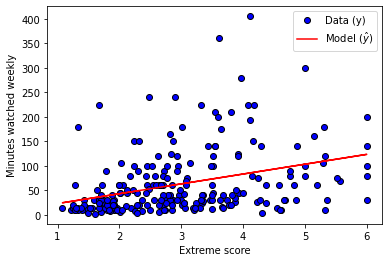

In [70]:
# LINEAR REGRESSION - EXTREME SCORE TO PREDICT WEEKLY MINUTES

slope, intercept, r, p, std_err = stats.linregress(df_out['extreme_score'], df_out['weekly_minutes'])
print(f'Intercept: {round(intercept, 2)}, slope: {round(slope, 2)}, r: {round(r, 2)} p: {round(p, 10)}')

design_matrix = np.asarray([[1, value] for value in df_out['extreme_score']])
beta = np.asarray([intercept, slope])

predicted_values = design_matrix @ beta

plt.plot(df_out['extreme_score'], df_out['weekly_minutes'], 'ko', markerfacecolor='b')
plt.plot(df_out['extreme_score'], predicted_values, '-', color='r')
plt.legend(('Data (y)','Model ($\^{y}$)'))

plt.xlabel('Extreme score')
plt.ylabel('Minutes watched weekly')
plt.show()